In [1]:
# QUESTIONS - OUTLIERS

In [2]:
# Clean the 'life_expectancy.csv' and export it for later use in code.
#
# Note: the filepath will be: '../data/clean_life_expectancy.csv'

In [3]:
# Dependencies.
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [4]:
##### CHANGE FILE PATH ONCE MERGED
# Declare a path to the file.
filepath = '../sarah_work/clean_life_expectancy.csv'

# Load file into a DataFrame.
df = pd.read_csv(filepath)

# Preview the DataFrame.
display(df.shape)
display(df.info())
display(df.head())

(1365, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1365 non-null   int64  
 1   country                  1365 non-null   object 
 2   year                     1365 non-null   int64  
 3   life_expectancy          1365 non-null   float64
 4   smoking_deaths           1365 non-null   float64
 5   obesity_deaths           1365 non-null   float64
 6   deaths_by_suicide        1365 non-null   float64
 7   mean_years_of_schooling  1365 non-null   float64
 8   population               1365 non-null   int64  
 9   gdp                      1365 non-null   float64
 10  gov_health_expenditure   1365 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 117.4+ KB


None

,Unnamed: 0,country,year,life_expectancy,smoking_deaths,obesity_deaths,deaths_by_suicide,mean_years_of_schooling,population,gdp,gov_health_expenditure
0,0,Afghanistan,2002,56.4538,4.484723,109.050644,7.85,1.522516,21000258,1280.4631,1.21
1,1,Afghanistan,2003,57.3445,4.593383,110.698310,7.72,1.579871,22645136,1292.3335,5.46
2,2,Afghanistan,2004,57.9436,4.665421,113.260590,7.77,1.637226,23553554,1260.0605,3.60
3,3,Afghanistan,2005,58.3608,4.708809,115.482414,7.64,1.694581,24411196,1352.3207,3.37
4,4,Afghanistan,2006,58.6844,4.746228,119.301240,7.56,1.776703,25442946,1366.9932,2.72


In [5]:
# # Create bins 

# bins = [0, 12275, 68000]

# # Create labels for these bins
# labels = ["low", "high"]

In [6]:
df["gdp"] = pd.cut(df.gdp, bins, labels=labels, include_lowest=True)                 

df.head()

,Unnamed: 0,country,year,life_expectancy,smoking_deaths,obesity_deaths,deaths_by_suicide,mean_years_of_schooling,population,gdp,gov_health_expenditure
0,0,Afghanistan,2002,56.4538,4.484723,109.050644,7.85,1.522516,21000258,low,1.21
1,1,Afghanistan,2003,57.3445,4.593383,110.698310,7.72,1.579871,22645136,low,5.46
2,2,Afghanistan,2004,57.9436,4.665421,113.260590,7.77,1.637226,23553554,low,3.60
3,3,Afghanistan,2005,58.3608,4.708809,115.482414,7.64,1.694581,24411196,low,3.37
4,4,Afghanistan,2006,58.6844,4.746228,119.301240,7.56,1.776703,25442946,low,2.72


In [8]:
df.groupby("gdp").agg({"deaths_by_suicide": "mean"})

C:\Users\sruth\AppData\Local\Temp\ipykernel_17656\2089400228.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("gdp").agg({"deaths_by_suicide": "mean"})


,deaths_by_suicide
gdp,
low,11.544969
high,9.373444


In [8]:
df1 = df.groupby('country').agg({'deaths_by_suicide': 'mean', 'gdp': 'mean'}).reset_index()
df1.describe()

,deaths_by_suicide,gdp
count,79.000000,79.000000
mean,11.157005,8503.568870
std,8.449255,10242.782308
min,2.585000,965.583258
25%,5.352292,2607.602497
50%,9.522928,4881.140300
75%,14.198944,10451.868756
max,58.495178,67559.307625


In [13]:
#Despite its classification as a lower-middle income country, Eswatini suffers from severe poverty, corruption, and high unemployment.
df1.loc[df1.deaths_by_suicide > 57]

,country,deaths_by_suicide,gdp
24,Eswatini,58.495178,7255.340628


In [14]:
df1.loc[df1.gdp > 60000]

,country,deaths_by_suicide,gdp
75,United Arab Emirates,5.36125,67559.307625


The r-squared is: 0.028572298511671857


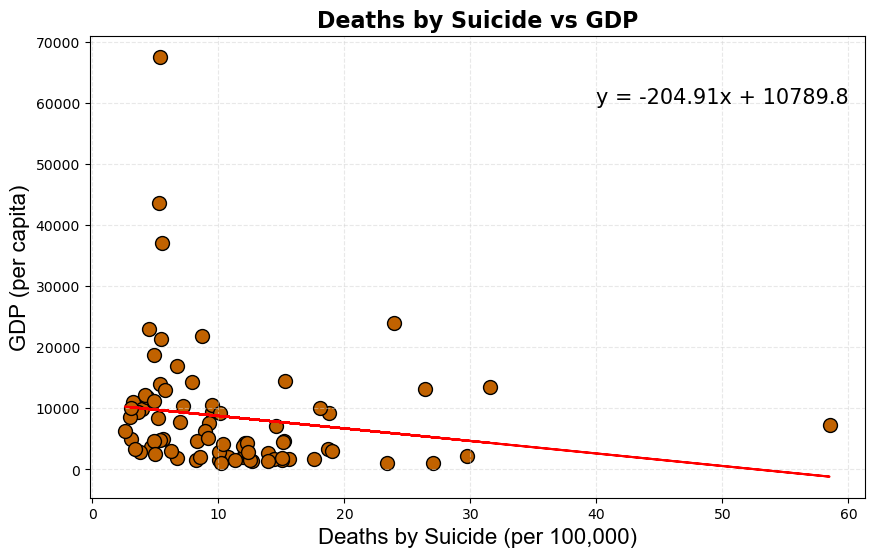

In [9]:
df1 = df.groupby('country').agg({'deaths_by_suicide': 'mean', 'gdp': 'mean'}).reset_index()

# USING LINREGRESS
x_values = df1.deaths_by_suicide
y_values = df1.gdp

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#C16200", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "r-") # plot the line of best fit

# Step 4: Customizations
plt.xlabel("Deaths by Suicide (per 100,000)", fontsize=16, fontname="Arial")
plt.ylabel("GDP (per capita)", fontsize=16, fontname="Arial")
plt.title("Deaths by Suicide vs GDP", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(40,60000),fontsize=15,color="black")

print(f"The r-squared is: {rvalue**2}")
plt.show()


# # Step 1: Get the Data
# df1 = df.groupby('country').agg({'deaths_by_suicide': 'mean', 'gdp': 'mean'}).reset_index()

# # Step 2: Make the canvas
# plt.figure(figsize=(10, 6))

# # Step 3: Make the basic plot
# plt.scatter(df1['deaths_by_suicide'], df1['gdp'], color="#C16200", edgecolor="black", s=100)

# # Step 4: Customizations
# plt.xlabel("Deaths by Suicide (per 100,000)", fontsize=16, fontname="Arial")
# plt.ylabel("GDP (per capita)", fontsize=16, fontname="Arial")
# plt.title("Deaths by Suicide vs GDP", fontweight="bold", fontsize=16)

# plt.xlim(0,65)
# plt.ylim(0, 70000)

# plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# # Step 5: Show/Save the graph
# plt.show()

In [10]:
df2 = df.groupby('country').agg({'deaths_by_suicide': 'mean', 'mean_years_of_schooling': 'mean'}).reset_index()
df2.head()


,country,deaths_by_suicide,mean_years_of_schooling
0,Afghanistan,6.739444,2.104902
1,Algeria,3.190000,7.496159
2,Angola,14.541206,4.171762
3,Argentina,8.677917,10.547400
4,Armenia,3.931429,11.078725


The r-squared is: 0.02234076384851945


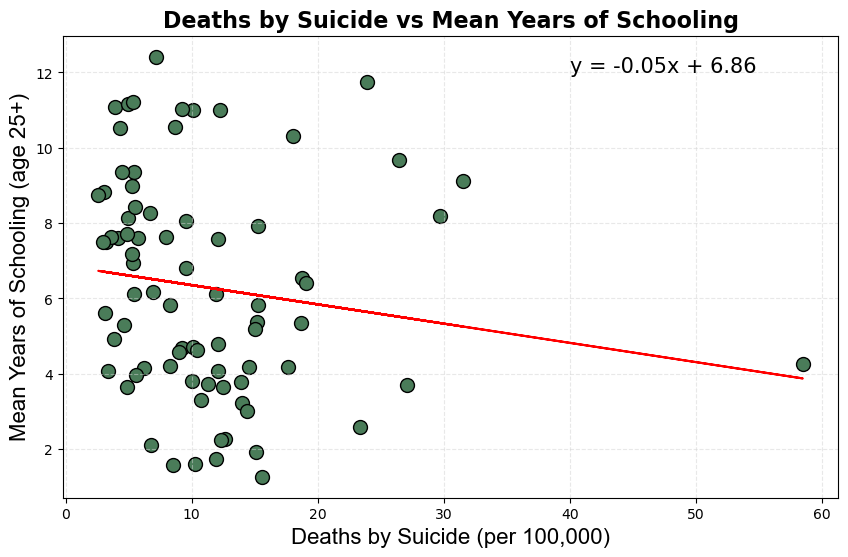

In [12]:
df2 = df.groupby('country').agg({'deaths_by_suicide': 'mean', 'mean_years_of_schooling': 'mean'}).reset_index()

# USING LINREGRESS
x_values = df2.deaths_by_suicide
y_values = df2.mean_years_of_schooling

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#4A7C59", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "r-") # plot the line of best fit

# Step 4: Customizations
plt.xlabel("Deaths by Suicide (per 100,000)", fontsize=16, fontname="Arial")
plt.ylabel("Mean Years of Schooling (age 25+)", fontsize=16, fontname="Arial")
plt.title("Deaths by Suicide vs Mean Years of Schooling", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(40,12),fontsize=15,color="black")

print(f"The r-squared is: {rvalue**2}")
plt.show()

# # Step 1: Get the Data
# df2 = df.groupby('country').agg({'deaths_by_suicide': 'mean', 'mean_years_of_schooling': 'mean'}).reset_index()
# # print(df2)

# # # Step 2: Make the canvas
# plt.figure(figsize=(10, 6))

# # Step 3: Make the basic plot
# plt.scatter(df2['deaths_by_suicide'], df2['mean_years_of_schooling'], color="#c16200", edgecolor="black", s=150)

# # Step 4: Customizations
# plt.xlabel("Deaths by Suicide (per 100,000)", fontsize=16, fontname="Arial")
# plt.ylabel("Mean Years of Schooling (adults 25+)", fontsize=16, fontname="Arial")
# plt.title("Deaths by Suicide vs Mean Years of Schooling", fontweight="bold", fontsize=16)

# plt.xlim(0,35)
# plt.ylim(0, 14)

# plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# # Step 5: Show/Save the graph
# plt.show()